<a target="_blank" href="https://colab.research.google.com/github/victorlymarev/pandas/blob/main/notebooks/15-concat-and-merge.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Соединение таблиц
#### [Ссылка на видео](https://youtu.be/dpUTI0UtuuM)

In [ ]:
import pandas as pd
import os

In [ ]:
path_marks = '../tables/оценки.xlsx' if os.path.exists('../tables/оценки.xlsx') else 'https://drive.google.com/uc?id=17f4DXx53J0WooNkhO13xidseZJ-O2obs'

marks_6a, marks_6b, marks_6v, marks_6g = pd.read_excel(path_marks, sheet_name=None).values()

## Concat

Метод соединяет таблицы между собой

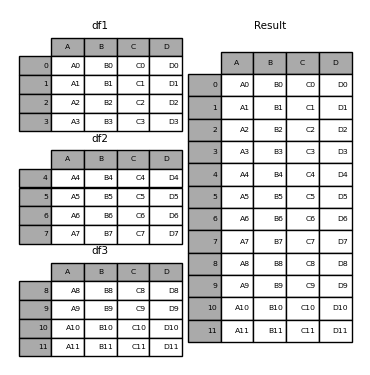

In [ ]:
marks_6a.head(3)

In [ ]:
pd.concat([marks_6a, marks_6b, marks_6v, marks_6g])

In [ ]:
pd.concat([marks_6a.drop('Математика', axis=1), marks_6b, marks_6v, marks_6g])

In [ ]:
pd.concat([marks_6a, marks_6b, marks_6v, marks_6g], ignore_index=True)
# Это будет эквивалентно тому 
# pd.concat([marks_a6, marks_b6, marks_v6, marks_g6]).reset_index(drop=True)

Можно добавить дополнительную колонку, которая будет говорить из какой таблицы взята строка

In [ ]:
pd.concat([marks_6a, marks_6b, marks_6v, marks_6g], keys=['6а', '6б', '6в', '6г'])

In [ ]:
(pd.concat([marks_6a, marks_6b, marks_6v, marks_6g], keys=['6а', '6б', '6в', '6г'])
    .reset_index(level=0, names='Класс')
    .head()
)

## merge

#### Соединяет разные таблицы на основе общих колонок

In [ ]:
url = 'https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%BB%D0%BE%D0%B2%D0%B5%D0%BA_%D0%B3%D0%BE%D0%B4%D0%B0_(Time)'

year = (pd.read_html(url)
            [1]
            [['Год', 'Лауреат']]
            .drop_duplicates('Лауреат')
            .sample(60, random_state=2)
            .sort_values('Год')
)

lifetime = (pd.read_html(url)
                [1]
                [['Лауреат', 'Годы жизни']]
                .drop_duplicates('Лауреат')
                .sample(50, random_state=12)
                .fillna('нет')
                .sort_index()
)

In [ ]:
year.head()

In [ ]:
lifetime.head()

Соединяем таблицы на основе колонки 'Лауреат', беря ключи из левой таблицы (year)

In [ ]:
year.merge(lifetime, on='Лауреат', how='left').head(10)

Соединяем таблицы на основе колонки 'Лауреат', беря ключи из правой таблицы (lifetime)

In [ ]:
year.merge(lifetime, on='Лауреат', how='right').head(5)

Соединяем таблицы на основе колонки 'Лауреат', беря ключи, которые есть хотя бы в одной таблице

In [ ]:
year.merge(lifetime, on='Лауреат', how='outer').sample(10, random_state=0)

Соединяем таблицы на основе колонки 'Лауреат', беря ключи, которые есть в каждой таблице

In [ ]:
year.merge(lifetime, on='Лауреат', how='inner').head(10)

#### Соединяем таблицы с разными названиями колонок

In [ ]:
year_copy = year.rename({'Лауреат': 'Человек'}, axis=1)
year_copy.head()

In [ ]:
lifetime.head()

Можно использовать метод rename, после чего объединить таблицы как прежде

In [ ]:
(year_copy
    .rename({'Человек': 'Лауреат'}, axis=1)
 
    .merge(lifetime, on='Лауреат', how='inner')
    .head()
)

In [ ]:
(year_copy
    .merge(lifetime.rename({'Лауреат': 'Человек'}, axis=1), on='Человек', how='inner')
    .head()
)

Можно указать ключи левой и правой таблиц

In [ ]:
(year_copy
    .merge(lifetime, left_on='Человек', right_on='Лауреат', how='inner')
    .head()
)

## join

Работает так же как и merge, только на основе индексов

In [ ]:
year.set_index('Лауреат').join(lifetime.set_index('Лауреат'), how='left').head()

In [ ]:
year.join(lifetime.set_index('Лауреат'), on='Лауреат', how='left').head()

## Отношения между таблицами

### Один к одному
Один ключ в одной таблице соответствует одному ключу в другой таблице

In [ ]:
year.merge(lifetime, on='Лауреат', how='outer').head()

### Отношение один ко многим

In [ ]:
year_full = (pd.read_html(url)
            [1]
            [['Год', 'Лауреат']]
            .sort_values('Год')
)

lifetime_full = (pd.read_html(url)
                [1]
                [['Лауреат', 'Годы жизни']]
                .drop_duplicates('Лауреат')
                .sort_index()
)

In [ ]:
year_full.shape

In [ ]:
lifetime_full.shape

In [ ]:
year_full.query('Лауреат == "Михаил Горбачёв"')

In [ ]:
lifetime_full.query('Лауреат == "Михаил Горбачёв"')

In [ ]:
(year_full
    .query('Лауреат == "Михаил Горбачёв"')
    .merge(lifetime_full
          .query('Лауреат == "Михаил Горбачёв"'),
          how='left', on='Лауреат')
)

In [ ]:
(year_full
    .query('Лауреат == "Михаил Горбачёв"')
    .merge(lifetime_full
          .query('Лауреат == "Михаил Горбачёв"'),
          how='right', on='Лауреат')
)

In [ ]:
year_full.merge(lifetime_full, how='left', on='Лауреат')

## Применение метода merge в аналитике не только для обычного соединения таблиц

### Необходимо узнать какой процент людей, побывавших в магазине в одном месяце вернулись в следующим

In [ ]:
path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'

sales = (pd.read_parquet(path_sales_2022)
    [['customer_id', 'purchase_date']]
    .drop_duplicates()
    .reset_index(drop=True)
)
sales.head()

Дату покупки приводим к концу месяца

In [ ]:
(sales
    .assign(purchase_month = lambda x: x['purchase_date'].dt.normalize() 
            + pd.offsets.MonthEnd(0))
    .drop_duplicates(['customer_id', 'purchase_month'])
    [['customer_id', 'purchase_month']]
)

Добавляем индикатор

In [ ]:
(sales
    .assign(purchase_month = lambda x: x['purchase_date'].dt.normalize() 
            + pd.offsets.MonthEnd(0) - pd.offsets.MonthEnd(1))
    .drop_duplicates(['customer_id', 'purchase_month'])
    [['customer_id', 'purchase_month']]
    .assign(indicator = True)
)

Соединяем эту таблицу с таблицей сдивнутой вперед на один месяц

In [ ]:
pd.merge(
    (sales
        .assign(purchase_month = lambda x: x['purchase_date'].dt.normalize() 
                + pd.offsets.MonthEnd(0))
        .drop_duplicates(['customer_id', 'purchase_month'])
        [['customer_id', 'purchase_month']]
    ),
    (sales
        .assign(purchase_month = lambda x: x['purchase_date'].dt.normalize() 
                + pd.offsets.MonthEnd(0) - pd.offsets.MonthEnd(1))
        .drop_duplicates(['customer_id', 'purchase_month'])
        [['customer_id', 'purchase_month']]
        .assign(indicator = True)
    ),
    on=['customer_id', 'purchase_month'], # передаем список из названий колонок
    how='left'
    )

Считаем процент

In [ ]:
(pd.merge(
        (sales
            .assign(purchase_month = lambda x: x['purchase_date'].dt.normalize() 
                    + pd.offsets.MonthEnd(0))
            .drop_duplicates(['customer_id', 'purchase_month'])
            [['customer_id', 'purchase_month']]
        ),
        (sales
            .assign(purchase_month = lambda x: x['purchase_date'].dt.normalize() 
                    + pd.offsets.MonthEnd(0) - pd.offsets.MonthEnd(1))
            .drop_duplicates(['customer_id', 'purchase_month'])
            [['customer_id', 'purchase_month']]
            .assign(indicator = True)
        ),
        on=['customer_id', 'purchase_month'],
        how='left'
    )
    .query('purchase_month < "2022-12-31"')
    ['indicator']
    .notna() 
    .mul(100) # умножаем на 100, чтобы получить проценты
    .mean()
    .round(2)
)

## Несколько важных моментов

### Важный момент про типы данных

In [ ]:
path_w_ends = '../tables/выходные.csv' if os.path.exists('../tables/выходные.csv') else 'https://drive.google.com/uc?id=1hAsoXSPTFihFmBuF-E0uSj9pX4gpojwC'

w_ends = (pd.read_csv(path_w_ends)
    .set_axis(['purchase_date', 'is_weekend'], axis=1)
)
w_ends.head()

In [ ]:
(sales
    .assign(purchase_date= lambda x: x['purchase_date'].dt.normalize())
    .head()
)

In [ ]:
(sales
    .assign(purchase_date= lambda x: x['purchase_date'].dt.normalize())
    .merge(
            w_ends, 
            on='purchase_date', how='left')
)

In [ ]:
(sales
    .assign(purchase_date= lambda x: x['purchase_date'].dt.normalize())
    .merge(
            w_ends.astype({'purchase_date': 'datetime64'}), 
            on='purchase_date', how='left')
)

### По возможности выполняйте фильтрацию и отбор колонок до соединения

#### Например: нам нужно отобрать покупки только за нерабочие дни

Вариант 1: фильтруем таблицу после merge

In [ ]:
(sales
    .assign(purchase_date= lambda x: x['purchase_date'].dt.normalize())
    .merge(
            w_ends.astype({'purchase_date': 'datetime64'}), 
            on='purchase_date', how='left')
    .query('is_weekend')
)

Вариант 2: Сначала отбираем только даты нерабочих дней, а потом к этим датам присоединняем таблицу с покупками

In [ ]:
(sales
    .assign(purchase_date= lambda x: x['purchase_date'].dt.normalize())
    .merge(
            w_ends.astype({'purchase_date': 'datetime64'}).query('is_weekend'), 
            on='purchase_date', how='inner')
)

### Недопускайте пропусков в колонках, по которым соединяете таблицы.
 В большинстве случаев, с ними лучше работать отдельно

In [ ]:
one = pd.DataFrame({'col_to_merge': [1, 2, None, None], 'one': 1})
two = pd.DataFrame({'col_to_merge': [1, 2, None, None], 'two': 2})

In [ ]:
one

In [ ]:
two

In [ ]:
one.merge(two, how='inner', on='col_to_merge')

## Merge_asof

Функция для соединения таблиц по ближайшей дате

In [ ]:
path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events).drop('shop_id', axis=1)

hired = events.query('event_type == "Прием на работу"')
dismissed = events.query('event_type == "Увольнение"')

Один и тот же сотрудник встречается в таблице 2 раза

In [ ]:
hired.sort_values('i_pernr').head(8)

In [ ]:
dismissed.sort_values('i_pernr').head(8)

#### Для каждого приема на работу найти соответствующую позицию в увольнении

Соединение при помощи merge некорректно

In [ ]:
hired.merge(dismissed, how='left', on='i_pernr')

Смотрим как много лишних наблюдений получилось

In [ ]:
(hired
    .merge(dismissed, how='left', on='i_pernr')
    .query('i_pernr.duplicated(keep=False)')
    .sort_values('i_pernr')
)

Применяем merge_asof

In [ ]:
pd.merge_asof(hired, dismissed, on='date', by='i_pernr', direction='forward')

In [ ]:
pd.merge_asof(hired,
              dismissed.assign(date_dismiss=lambda x: x['date']),
              on='date',
              by='i_pernr',
              direction='forward')

In [ ]:
pd.merge_asof(hired.rename({'date': 'date_hire'}, axis=1),
              dismissed.rename({'date': 'date_dismiss'}, axis=1),
              left_on='date_hire', 
              right_on='date_dismiss',
              by='i_pernr',
              direction='forward')

### Посчитаем с какой периодичнотью к нам в среднем ходят клиенты

In [ ]:
sales.rename(columns={'purchase_date':'purchase_date_first'})

In [ ]:
pd.merge_asof(
    sales.rename(columns={'purchase_date':'purchase_date_first'}).dropna(),
    sales.rename(columns={'purchase_date':'purchase_date_last'}).dropna(),
    left_on='purchase_date_first',
    right_on='purchase_date_last',
    by='customer_id',
    direction='forward'
)

In [ ]:
pd.merge_asof(
    sales.rename(columns={'purchase_date':'purchase_date_first'}).dropna(),
    sales.rename(columns={'purchase_date':'purchase_date_last'}).dropna(),
    left_on='purchase_date_first', right_on='purchase_date_last',
    by='customer_id', direction='forward',
    allow_exact_matches=False
)

Считаем среднюю периодичность

In [ ]:
(pd.merge_asof(
    sales.rename(columns={'purchase_date':'purchase_date_first'}).dropna(),
    sales.rename(columns={'purchase_date':'purchase_date_last'}).dropna(),
    left_on='purchase_date_first', right_on='purchase_date_last',
    by='customer_id', direction='forward',
    allow_exact_matches=False
    )
    .assign(time_interval=lambda x: x['purchase_date_last'] - x['purchase_date_first'])
    ['time_interval']
    .mean()
    .days
)

Считаем долю людей вернувшихся в течение 30 дней

In [ ]:
(pd.merge_asof(
    sales.rename(columns={'purchase_date':'purchase_date_first'}).dropna(),
    sales.rename(columns={'purchase_date':'purchase_date_last'}).dropna(),
    left_on='purchase_date_first', right_on='purchase_date_last',
    by='customer_id', direction='forward',
    allow_exact_matches=False
    )
    .assign(return_30_days_flag=lambda x: (x['purchase_date_last'] - x['purchase_date_first']).dt.days <= 30)
    ['return_30_days_flag']
    .mean()
)

# Задания

#### Описание таблиц лежит [здесь](https://github.com/victorlymarev/pandas/tree/main/tables#%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D0%B5-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86)

Некоторые таблицы занимают много памяти, поэтому каждые 5-10 заданий лучше перезапускайте ноутбук.

В формулировке некоторых заданий может содержаться вариативность. Если у вас есть сомнения, что требуется в задании, попробуйте решить несколько вариантов. Если вы не понимаете задание, можете написать об этом в комментариях под видео.

В большинстве случаев внешний вид итоговой таблицы не определен. Выведите на экран наиболее адекватный вариант. То есть таблицу, из которой можно будет сделать выводы.

Курс пока находится в разработке. Вы можете помочь другим людям добавив свое решение [сюда](https://docs.google.com/forms/d/1HYTBz_KfssY3Jps2dC3n0YnEqa6WBb5OIhLo1d32Xzw/edit).

Посмотреть решения других людей можно [здесь](https://docs.google.com/spreadsheets/d/1pMDYO-9UneLbPPnEuQ2shig0TOJdQTU-zipifyAnZMk/edit?resourcekey#gid=1998648012)

### Задание 1

Добавление колонки из единиц может быть полезным, если у вас есть две почти одинаковые таблицы, но с разным количеством записей. В этом случае, сделав индикатор того, из какой таблицы взята запись, вы без труда найдете отличие в таблицах.

Перед вам сейчас две очень похожие таблицы. В них содержатся табельный номер и зарплата. Найдите записи, которые встечаются в таблице 1, но не встречаются в таблице 2 и наоборот. 


<details>

<summary>Подсказка</summary>
 
Для этого сначала в каждой из таблиц создайте колонки с индикатором. Только назовите эти колонки по-разному. Затем соедините эти таблицы мотодом outer по колонкам i_pernr и salary. В конце отфильтруйте записи в полученной таблице, воспользовавшись методом isna().

</details>


In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl_1 = (empl[['i_pernr', 'salary']].drop_duplicates('i_pernr')
          .sample(frac=0.7, random_state=123).sort_index().reset_index(drop=True))
empl_1.head()

In [ ]:
empl_2 = (empl[['i_pernr', 'salary']].drop_duplicates('i_pernr')
          .sample(frac=0.7, random_state=1234).sort_index().reset_index(drop=True))
empl_2.head()

In [ ]:
# напишите свой код здесь

### Задание 2

Поставить флаг того, что товар выводится из продажи в следующем месяце. (1 если выводится, 0 если товар будет в продаже в следующем месяце)

Если в таблице товар есть в месяце х, но его нет в месяце х + 1, то значит он был выведен из продажи в месяце

In [ ]:
import os
import pandas as pd

path_prices = '../tables/prices.parquet' if os.path.exists('../tables/prices.parquet') else 'https://drive.google.com/uc?id=1_KfYyYCsib8woanbP3VouLUpYp103dV5'

prices = pd.read_parquet(path_prices)
prices.head()

In [ ]:
# напишите свой код здесь

### Задание 3

В списке tables содержится 10 фрагментов таблиц sales. Соедините все таблицы в одну, избавьтесь от дубликатов, отсортируйте по индексу и сбросьте его так, чтобы исходная колонка с индексом удалилась

In [ ]:
import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'

sales = pd.read_parquet(path_sales_2022)
tables = [sales.sample(5000, random_state=i) for i in range(10)]
# отдельную таблицу можно получить по индексу, указав его в квадратных скобках
tables[0].head()

In [ ]:
# напишите свой код здесь

### Задание 4

Для каждого сотрудника на конец каждого месяца поставьте флаг того, что он уволится в течение 91 дня

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events)
events.head()

In [ ]:
# напишите свой код здесь

### Задание 5

Для каждого сотрудника на конец каждого месяца поставьте флаг того, что он волится в течение 3 месяцев (то есть через 3 месяца он не будет находиться в списке сотрудников)

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 6

На конец каждого месяца посчитайте, сколько дней проработал сотрудник с момента последнего устройства на работу

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events)
events.head()

In [ ]:
# напишите свой код здесь

### Задание 7

Поставьте флаг того, что товар был куплен по скидке и укажите размер этой скидки в процентах

In [ ]:
import os
import pandas as pd

path_prices = '../tables/prices.parquet' if os.path.exists('../tables/prices.parquet') else 'https://drive.google.com/uc?id=1_KfYyYCsib8woanbP3VouLUpYp103dV5'

prices = pd.read_parquet(path_prices)
prices.head()

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_sample_check на path_sales внутри функции read_parquet

path_sales_sample_check = '../tables/sales_sample_check.parquet' if os.path.exists('../tables/sales_sample_check.parquet') else 'https://drive.google.com/uc?id=1oYT518oqGnEF51PSFHfSHYNP-690ktFL'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_sample_check)
sales.head()

In [ ]:
# напишите свой код здесь

### Задание 8

Посчитайте число дней до ближайшего выходного. В день перед выходным должно стоять число 1, а для выходных установите значение -1

In [ ]:
import os
import pandas as pd

path_w_ends = '../tables/выходные.csv' if os.path.exists('../tables/выходные.csv') else 'https://drive.google.com/uc?id=1hAsoXSPTFihFmBuF-E0uSj9pX4gpojwC'

w_ends = pd.read_csv(path_w_ends)
w_ends.head()

In [ ]:
# напишите свой код здесь

### Задание 9

Посчитайте средний возраст сотрудника при устройстве на работу. 

Вы уже делали похожее задание, но тогда было условие, что сотрудник пришел на работу впервые

In [ ]:
import os
import pandas as pd

path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events)
events.head()

In [ ]:
path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 10

Узнайте, какой процент покупателей, которые делали покупки в магазине 3 в январе и феврале 2022 года вернулись в любой из магазинов с марта по август включительно

In [ ]:
import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
# напишите свой код здесь

### Задание 11

Узнайте, сколько в среднем работают в компании кассиры и сколько консультанты. Возьмите только тех сотрудников, которые уже уволись, если сотурудник приходил и увольнялся несколько раз, то его нужно учитывать несколько раз. В качестве должности берите должность при устройтсве на работу

In [ ]:
import os
import pandas as pd

path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events)
events.head()

In [ ]:
path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 12

Для каждого сотрудника найдите отношение его текущей зарплаты к зарплате при трудоустройстве. Учитывайте, что сотрудник мог устраиваться на работу нескольько раз.

Cделайте это используя merge и merge_asof и не используйте groupby

In [ ]:
import os
import pandas as pd

path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events)
events.head()

In [ ]:
path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 13

Посчитайте инфляцию.

Посмотрите на товары, которые были в продаже как 31 декабря 2015 года, так и 31 декабря 2022 года. Затем посчитайте отношение между ценами за этот период. Из полученного значения посчитайте среднюю годовую инфляцию за период.

In [ ]:
import os
import pandas as pd

path_prices = '../tables/prices.parquet' if os.path.exists('../tables/prices.parquet') else 'https://drive.google.com/uc?id=1_KfYyYCsib8woanbP3VouLUpYp103dV5'

prices = pd.read_parquet(path_prices)
prices.head()

In [ ]:
# напишите свой код здесь

### Задание 14

Вывидите спиок сотрудников (можете попробовать еще вывести их должноть), которые работали 18 июля 2021 года. Если человек устроился в этот день на работу или уволился, то его тоже надо учитывать

In [ ]:
import os
import pandas as pd

path_events = '../tables/events.parquet' if os.path.exists('../tables/events.parquet') else 'https://drive.google.com/uc?id=1Phn06U4-BI0XqtYAgtlM6IuoXRIAGQlO'

events = pd.read_parquet(path_events)
events.head()

In [ ]:
path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 15

Посчитайте суммарную выручку в крупных магазинах (это задание можно сделать и без джойна)

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_sample на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_sample = '../tables/sales_sample.parquet' if os.path.exists('../tables/sales_sample.parquet') else 'https://drive.google.com/uc?id=1BgxAxPauzC4LObY3N65PgAvnU3f5QRj2'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_sample)
sales.head()

In [ ]:
path_shops = '../tables/shops.xlsx' if os.path.exists('../tables/shops.xlsx') else 'https://drive.google.com/uc?id=1gfnmceJa3Mc1X06NftTx9G9QfKfprjEB'

shops = pd.read_excel(path_shops)
shops.head()

In [ ]:
# напишите свой код здесь

### Задание 16

Найдите те товары (product_code_3), которые были в продаже, но никогда не были куплены

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_sample на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_sample = '../tables/sales_sample.parquet' if os.path.exists('../tables/sales_sample.parquet') else 'https://drive.google.com/uc?id=1BgxAxPauzC4LObY3N65PgAvnU3f5QRj2'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_sample)
sales.head()

In [ ]:
path_goods_descr = '../tables/goods_description.parquet' if os.path.exists('../tables/goods_description.parquet') else 'https://drive.google.com/uc?id=1YbiD02Rev-X_WWV9nPSG1zZFmEh2JjPh'

goods_descr = pd.read_parquet(path_goods_descr)
goods_descr.head()

In [ ]:
# напишите свой код здесь

### Задание 17

Задание на нампай

Две матрицы или 2 вектора можно соединить друг с другом. Для этого в нампае есть функции np.vstack и np.hstack. Посмотрите как они работают. Создайте матрицу (какую хотите) 8 на 5 и присоединиете справа к этой матрице вектор длинною 8. Посмотрите документацию по функциям np.stack и np.concatenate и попробуйте поиграться с ними. Разница между двумя функциями состоит в том, что np.stack объединяет массивы вдоль новой оси, а np.concatenate вдоль существующей. То есть если вы соедините 4 матрицы 7 на 9 при помощи np.stack, то получите трехмерный массив. А если вы будете использовать функцию np.concatenate, то размерность получившегося массива останется той же самой.

In [ ]:
import numpy as np

In [ ]:
x, y = np.random.randint(0, 10, (2, 5, 2))

In [ ]:
x

In [ ]:
y

In [ ]:
np.vstack([x, y])

In [ ]:
np.hstack([x, y])

In [ ]:
np.hstack([np.arange(5)] * 2)

In [ ]:
np.vstack([np.arange(5)] * 2)

In [ ]:
a, b = np.random.randint(0, 10, (2, 3, 5, 2))

In [ ]:
a.shape

In [ ]:
np.hstack([a, b]).shape

In [ ]:
np.vstack([a, b]).shape